5.971471


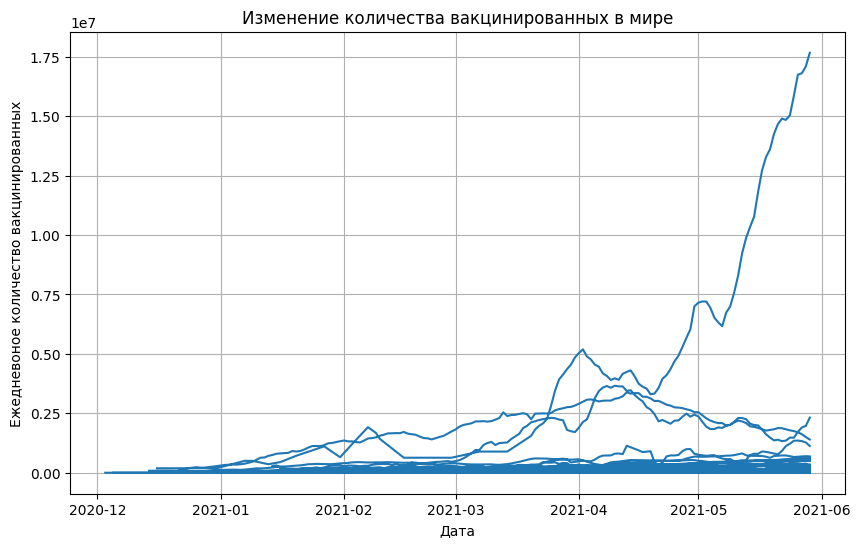

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns

covid_data = pd.read_csv("C:/Users/HONOR/OneDrive/Рабочий стол/IDE/COVID/covid_data.csv")
vaccinations_data = pd.read_csv("C:/Users/HONOR/OneDrive/Рабочий стол/IDE/COVID/country_vaccinations.csv")
#vaccinations_data = vaccinations_data[
#    ['country', 'date', 'total_vaccinations', 
#     'people_vaccinated', 'people_vaccinated_per_hundred',
#     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
#     'daily_vaccinations', 'vaccines']
#]
covid_data = covid_data.groupby(['date', 'country'], as_index=False)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
covid_data['date'] = pd.to_datetime(covid_data['date'])
start_date = covid_data['date'].min()
end_date = covid_data['date'].max()
covid_data=covid_data[(covid_data['date']>=start_date) & (covid_data['date']<=end_date)]
vaccinations_data=vaccinations_data[(vaccinations_data['date']>=start_date)&(vaccinations_data['date']<=end_date)]
covid_df = covid_data.merge(vaccinations_data, on=['date', 'country'], how='left')
covid_df.to_csv('covid_df.csv', index=False)
covid_df=covid_df.loc[covid_df['daily_confirmed']>=0]
#display(covid_df.shape)
#Первый график
#covid_df=covid_df.dropna(subset=['daily_confirmed'])
#grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
#grouped_cases.plot(
#    kind='line',
#    figsize=(12, 4),
#    title='Ежедневная заболеваемость во времени',
#    grid = True,
#    lw=3
#)
#plt.show()

covid_vaccinations_data=pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/COVID/covid_vaccinations_data.csv')
covid_vaccinations_data['date']=pd.to_datetime(covid_vaccinations_data['date'])
data_filtered=covid_vaccinations_data[covid_vaccinations_data['date']=='2021-02-28']
plt.figure(figsize=(10,6))
plt.plot(covid_vaccinations_data['date'], covid_vaccinations_data['daily_vaccinations'])
vaccinations_on_28_02=data_filtered['daily_vaccinations'].sum()
print(round(vaccinations_on_28_02)/1000000)
plt.title('Изменение количества вакцинированных в мире')
plt.xlabel('Дата')
plt.ylabel('Ежедневоное количество вакцинированных')
plt.grid(True)
plt.show()


#countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
#croped_covid_df = covid_df[covid_df['country'].isin(countries)]

#populations = pd.DataFrame([
#    ['Canada', 37664517],
#    ['Germany', 83721496],
#    ['Russia', 145975300],
#    ['Australia', 25726900],
#    ['United Kingdom', 67802690]
#    ],
#    columns=['country', 'population']
#)

#croped_covid_df = croped_covid_df.merge(populations, on=['country'], how=('left'))
#croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population']*100
#fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
#croped_covid_df.head()
#sns.histplot(
#    data=croped_covid_df,
#    x='daily_confirmed_per_hundred',
#    bins=25,
#    kde=True,
#    ax=axes[0]
#)
#axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
#sns.histplot(
#    data=croped_covid_df,
#    x='daily_confirmed_per_hundred',
#    y='country',
#    bins=25,
#    color='red',
#    ax=axes[1]
#)
#covid_data['death_rate'] = (covid_data['deaths'] / covid_data['confirmed']) * 100
#covid_data['recover_rate'] = (covid_data['recovered'] / covid_data['confirmed']) * 100

#fig = plt.figure(figsize=(10, 7))
#boxplot = sns.boxplot(
#    data=croped_covid_df,
#    y='country',
#    x='death_rate',
#    orient='h',
#    width=0.9
#)
#boxplot.set_title('Распределение летальности по странам')
#boxplot.set_xlabel('Летальность')
#boxplot.set_ylabel('Страна')
#boxplot.grid()

In [28]:
import plotly.express as px
import pandas as pd
covid_vaccinations_data=pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/COVID/covid_vaccinations_data.csv')
covid_vaccinations_data['date']=pd.to_datetime(covid_vaccinations_data['date'])
fig=px.choropleth(covid_vaccinations_data,
                  locations='country',
                  locationmode='country names',
                  color='total_vaccinations',
                  animation_frame='date',
                  title='Анимированная тепловая картограмма вакцинаций по странам')
fig.show()


